# Import dependencies

[MRDB]:  POdríais haber conatdo qué estaís haciendo en esta primera parte de limpieza

In [1]:
pip install distfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn
import numpy as np
from scipy.stats import beta, norm, poisson, pareto, chi2, lognorm
from distfit import distfit

# Limpieza de datos

In [3]:
df = pd.read_csv('credit_train.csv', sep=',', header=0)
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44596,dd476cab-a6a2-4b0d-a7d9-d36c18f22bf5,0b01d709-b9a3-4b90-9ec3-3a1bd01ab284,Fully Paid,441210,Short Term,739.0,852017.0,3 years,Rent,Debt Consolidation,14981.12,22.5,NaN,11,0,426170,591690.0,0.0,0.0
44597,6e9af5a0-cab7-49fc-aa56-463b343bb4ca,5b81d212-89bb-4576-9d87-50cc5572915c,Fully Paid,541486,Short Term,699.0,3179935.0,10+ years,Rent,Debt Consolidation,17145.03,19.6,32.0,14,0,568138,775764.0,0.0,0.0
44598,763c3d2e-9765-4b59-aa24-a137506a2ae8,cde293a8-4fa8-4884-a55b-f16b3c075330,Charged Off,538780,Long Term,718.0,1036165.0,< 1 year,Own Home,Debt Consolidation,23486.28,20.5,34.0,14,0,330315,459712.0,0.0,0.0
44599,6cc89de0-38eb-410b-b22c-d9187c984cec,a198398f-2ada-44db-a96d-ad1119916403,Fully Paid,220088,Short Term,728.0,1229319.0,1 year,Rent,Debt Consolidation,1249.82,14.5,15.0,2,0,42845,59136.0,0.0,0.0


In [4]:
# Exploring NaNs in data
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                     8563
Annual Income                    8563
Years in current job             1885
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    23985
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                       84
Tax Liens                           8
dtype: int64


In [5]:
df = df.dropna(subset=['Loan ID'])
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44596,dd476cab-a6a2-4b0d-a7d9-d36c18f22bf5,0b01d709-b9a3-4b90-9ec3-3a1bd01ab284,Fully Paid,441210,Short Term,739.0,852017.0,3 years,Rent,Debt Consolidation,14981.12,22.5,NaN,11,0,426170,591690.0,0.0,0.0
44597,6e9af5a0-cab7-49fc-aa56-463b343bb4ca,5b81d212-89bb-4576-9d87-50cc5572915c,Fully Paid,541486,Short Term,699.0,3179935.0,10+ years,Rent,Debt Consolidation,17145.03,19.6,32.0,14,0,568138,775764.0,0.0,0.0
44598,763c3d2e-9765-4b59-aa24-a137506a2ae8,cde293a8-4fa8-4884-a55b-f16b3c075330,Charged Off,538780,Long Term,718.0,1036165.0,< 1 year,Own Home,Debt Consolidation,23486.28,20.5,34.0,14,0,330315,459712.0,0.0,0.0
44599,6cc89de0-38eb-410b-b22c-d9187c984cec,a198398f-2ada-44db-a96d-ad1119916403,Fully Paid,220088,Short Term,728.0,1229319.0,1 year,Rent,Debt Consolidation,1249.82,14.5,15.0,2,0,42845,59136.0,0.0,0.0


In [6]:
# Assuming df is your DataFrame
# Calculate the mean of the 'Credit score' column
credit_score = df['Credit Score'].mean()

# Fill NaN values in the 'Credit score' column with the mean
df['Credit Score'] = df['Credit Score'].fillna(credit_score)

In [7]:
# Calculate the mean of the 'Annual income' column
annual_income = df['Annual Income'].mean()

# Fill NaN values in the 'Annual income' column with the mean
#df['Annual Income'] = df['Annual Income'].fillna(annual_income)

In [8]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.000000,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,1072.915062,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.000000,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.000000,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,1072.915062,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44596,dd476cab-a6a2-4b0d-a7d9-d36c18f22bf5,0b01d709-b9a3-4b90-9ec3-3a1bd01ab284,Fully Paid,441210,Short Term,739.000000,852017.0,3 years,Rent,Debt Consolidation,14981.12,22.5,NaN,11,0,426170,591690.0,0.0,0.0
44597,6e9af5a0-cab7-49fc-aa56-463b343bb4ca,5b81d212-89bb-4576-9d87-50cc5572915c,Fully Paid,541486,Short Term,699.000000,3179935.0,10+ years,Rent,Debt Consolidation,17145.03,19.6,32.0,14,0,568138,775764.0,0.0,0.0
44598,763c3d2e-9765-4b59-aa24-a137506a2ae8,cde293a8-4fa8-4884-a55b-f16b3c075330,Charged Off,538780,Long Term,718.000000,1036165.0,< 1 year,Own Home,Debt Consolidation,23486.28,20.5,34.0,14,0,330315,459712.0,0.0,0.0
44599,6cc89de0-38eb-410b-b22c-d9187c984cec,a198398f-2ada-44db-a96d-ad1119916403,Fully Paid,220088,Short Term,728.000000,1229319.0,1 year,Rent,Debt Consolidation,1249.82,14.5,15.0,2,0,42845,59136.0,0.0,0.0


In [9]:
# Exploring NaNs in data
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                    8563
Years in current job             1885
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    23985
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                       84
Tax Liens                           8
dtype: int64


In [10]:
df = df.dropna(subset=['Bankruptcies'])
df = df.dropna(subset=['Tax Liens'])
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.000000,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,1072.915062,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.000000,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.000000,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,1072.915062,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44595,3a9eb688-cb91-43db-bf6f-17289ac793f5,f336e9b9-a296-4d22-8f03-aabaf190d97c,Charged Off,332640,Short Term,745.000000,900144.0,10+ years,Rent,Debt Consolidation,11251.80,21.5,NaN,7,0,226746,341396.0,0.0,0.0
44596,dd476cab-a6a2-4b0d-a7d9-d36c18f22bf5,0b01d709-b9a3-4b90-9ec3-3a1bd01ab284,Fully Paid,441210,Short Term,739.000000,852017.0,3 years,Rent,Debt Consolidation,14981.12,22.5,NaN,11,0,426170,591690.0,0.0,0.0
44597,6e9af5a0-cab7-49fc-aa56-463b343bb4ca,5b81d212-89bb-4576-9d87-50cc5572915c,Fully Paid,541486,Short Term,699.000000,3179935.0,10+ years,Rent,Debt Consolidation,17145.03,19.6,32.0,14,0,568138,775764.0,0.0,0.0
44598,763c3d2e-9765-4b59-aa24-a137506a2ae8,cde293a8-4fa8-4884-a55b-f16b3c075330,Charged Off,538780,Long Term,718.000000,1036165.0,< 1 year,Own Home,Debt Consolidation,23486.28,20.5,34.0,14,0,330315,459712.0,0.0,0.0


In [11]:
# Plot Months since last delinquent
px.box(df['Months since last delinquent'])

In [12]:
# Filter out rows with values outside the acceptable range
upper_bound = 5000000
df_filtered = df[(df['Annual Income'] <= upper_bound)]

# Análisis descriptivo del dataset

El análisis descriptivo del dataset de préstamos revela varias tendencias y características sobre los solicitantes de préstamos y sus perfiles financieros:

**Distribución del Saldo Actual de Crédito**: La mayoría de los solicitantes tienen un saldo de crédito bajo, con una disminución notable en la frecuencia a medida que aumenta el saldo. Esto sugiere una gestión prudente de deuda por parte de los solicitantes, aunque algunos tienen saldos excepcionalmente altos.

**Distribución de Ingresos Anuales**: Los ingresos anuales muestran una variabilidad considerable, con un sesgo hacia ingresos más altos fuera del rango medio, lo que sugiere que una pequeña proporción de solicitantes tiene ingresos sustancialmente altos.

**Distribución de la Deuda Mensual**: La deuda mensual entre los solicitantes varía ampliamente. Aunque la mayoría gestiona niveles de deuda moderados, hay individuos que parecen tener compromisos financieros significativamente mayores.

**Monto del Préstamo Actual**: Existe una gama amplia en los montos de préstamo solicitados, con múltiples picos que podrían indicar categorías preferidas de montos de préstamo para los solicitantes.

**Número de Cuentas Abiertas**: Los solicitantes tienden a tener varias cuentas abiertas, lo cual es indicativo de su actividad crediticia. La variabilidad es notable, pero no extremadamente alta, lo que sugiere que la mayoría de los solicitantes mantienen un número manejable de cuentas.

[MRDB]:  Buen descripción

In [13]:
stats_descriptivas = df.describe()
print(stats_descriptivas)

       Current Loan Amount  Credit Score  Annual Income   Monthly Debt  \
count         4.451700e+04  44517.000000   3.596900e+04   44517.000000   
mean          1.184796e+07   1072.862389   1.377684e+06   18470.578997   
std           3.188812e+07   1319.406573   9.449454e+05   12274.804439   
min           1.542200e+04    585.000000   1.112450e+05       0.000000   
25%           1.801360e+05    711.000000   8.496990e+05   10205.660000   
50%           3.142920e+05    733.000000   1.167816e+06   16250.890000   
75%           5.265700e+05    750.000000   1.646179e+06   23979.140000   
max           1.000000e+08   7510.000000   3.647544e+07  435843.280000   

       Years of Credit History  Months since last delinquent  \
count             44517.000000                  20534.000000   
mean                 18.140506                     35.111035   
std                   6.955941                     22.002969   
min                   3.600000                      0.000000   
25%          

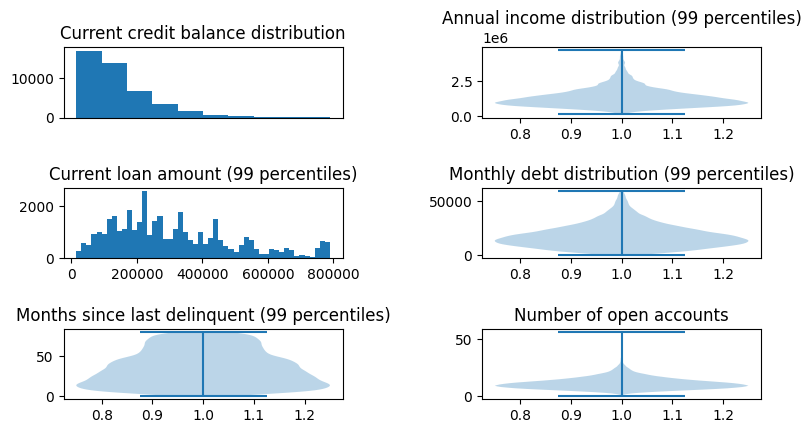

In [14]:
fig, ((balance, income), (loan, monthly), (delinquent, open)) = plt.subplots(nrows=3, ncols=2, figsize=(9, 4), sharey=False)

balance.set_title('Current credit balance distribution')
balance.hist(df['Current Credit Balance'][df['Current Credit Balance']<df['Current Credit Balance'].quantile(0.99)])
balance.set_xticks([])  # Remove x-axis ticks
balance.set_xticklabels([])  # Remove x-axis labels

income.set_title('Annual income distribution (99 percentiles)')
income.violinplot(df['Annual Income'][df['Annual Income']<df['Annual Income'].quantile(0.99)])

monthly.set_title('Monthly debt distribution (99 percentiles)')
monthly.violinplot(df['Monthly Debt'][df['Monthly Debt']<df['Monthly Debt'].quantile(0.99)])

loan.set_title('Current loan amount (99 percentiles)')
loan.hist(df['Current Loan Amount'][df['Current Loan Amount']<df['Current Loan Amount'].quantile(0.99)], bins=50)

delinquent.set_title('Months since last delinquent (99 percentiles)')
delinquent.violinplot(df['Months since last delinquent'][df['Months since last delinquent']<df['Months since last delinquent'].quantile(0.99)])

open.set_title('Number of open accounts')
open.violinplot(df['Number of Open Accounts'])

plt.subplots_adjust(bottom=0, wspace=0.5, hspace=1)

plt.show()

# Quitar?

[MRDB]: ?

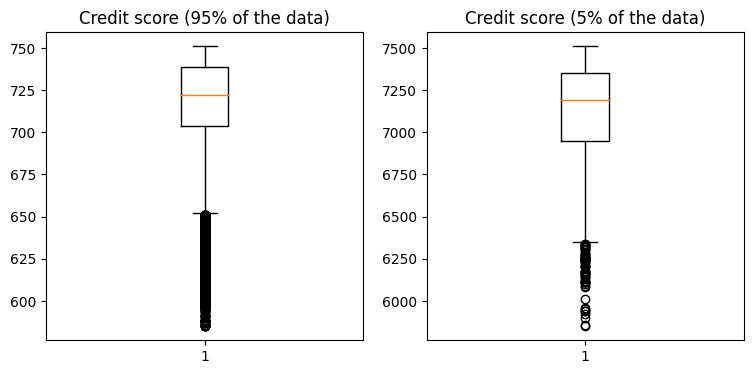

In [15]:
fig, (less, more) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=False)
less.set_title('Credit score (95% of the data)')
less.boxplot(df['Credit Score'][df['Credit Score']<df['Credit Score'].quantile(0.95)])
more.set_title('Credit score (5% of the data)')
more.boxplot(df['Credit Score'][df['Credit Score']>df['Credit Score'].quantile(0.95)])
plt.show()

# Análisis de los Ingresos Anuales.

## Normalización de la variable.
### Buscamos la distribución que mejor encaje en nuestra data.
### Observamos que los ingresos anuales siguen una distribución lognormal.

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.01 sec] [RSS: 1.61327e-12] [loc=1330741.026 scale=701646.520]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 5.34011e-12] [loc=111245.000 scale=1219496.026]
[distfit] >INFO> [pareto    ] [0.24 sec] [RSS: 1.09398e-11] [loc=111245.000 scale=0.000]
[distfit] >INFO> [dweibull  ] [1.37 sec] [RSS: 9.57315e-13] [loc=1195925.530 scale=524053.333]
[distfit] >INFO> [t         ] [8.76 sec] [RSS: 1.61582e-12] [loc=1327278.676 scale=708922.260]
[distfit] >INFO> [genextreme] [8.12 sec] [RSS: 2.91633e-13] [loc=1000420.758 scale=468712.450]
[distfit] >INFO> [gamma     ] [1.90 sec] [RSS: 1.54825e-12] [loc=-43162576.195 scale=10814.407]
[distfit] >INFO> [lognorm   ] [0.07 sec] [RSS: 3.00299e-13] [loc=-66440.052 scale=1249847.515]
[distfit] >INFO> [beta      ] [2.82 sec] [RSS: 4.06223e-13] [loc=109273.039 scale=12493948295278.863]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 6.85233e-12] [loc=111245.000 scale=4884083.000]


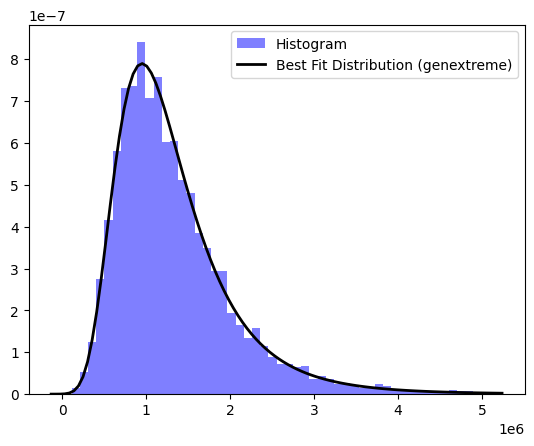

In [16]:
# Crear una instancia de distfit y ajustar las distribuciones a los datos
dist = distfit()
dist.fit_transform(df_filtered['Annual Income'])

# Obtener la distribución mejor ajustada y su función de densidad
best_distribution_name, best_distribution_params = dist.model['name'], dist.model['params']
best_distribution = dist.model['model']

# Plot histograma
plt.hist(df_filtered['Annual Income'], bins=50, density=True, alpha=0.5, color='b', label='Histogram')

# Plot función de densidad de distribución
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = best_distribution.pdf(x)  # Solo un argumento para la función de densidad
plt.plot(x, y, 'k', linewidth=2, label=f'Best Fit Distribution ({best_distribution_name})')

plt.legend()
plt.show()

### Por ello, transformamos los ingresos anuales para normalizarlos.

In [17]:
# Assuming your data follows a lognormal distribution and is stored in a variable called 'data'
# Apply the natural logarithm to each data point
log_annual_income = np.log(df_filtered['Annual Income'])

# Now 'log_data' should follow a normal distribution

[MRDB]: No tengo claro si me habéis entregado un trabajo en sucio o es que este es vuestro informe...

### Ahora, intentamos ajustar de nuevo la mejor distribución a los datos, pero vemos que nos devuelve una t distribution. Ya que sabemos que ahora siguen una normal podemos forzarla dado que el RSS es prácticamente el mismo para t y para norm.

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.413479] [loc=13.977 scale=0.501]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 11.9324] [loc=11.619 scale=2.357]
[distfit] >INFO> [pareto    ] [0.07 sec] [RSS: 11.9324] [loc=-134217716.381 scale=134217728.000]
[distfit] >INFO> [dweibull  ] [0.82 sec] [RSS: 0.526291] [loc=13.987 scale=0.425]
[distfit] >INFO> [t         ] [2.43 sec] [RSS: 0.413462] [loc=13.977 scale=0.501]
[distfit] >INFO> [genextreme] [0.88 sec] [RSS: 0.476266] [loc=13.799 scale=0.509]
[distfit] >INFO> [gamma     ] [0.49 sec] [RSS: 0.413644] [loc=-3.625 scale=0.014]
[distfit] >INFO> [lognorm   ] [0.13 sec] [RSS: 0.413479] [loc=-260629.712 scale=260643.689]
[distfit] >INFO> [beta      ] [1.01 sec] [RSS: 0.457378] [loc=-1101629.134 scale=1101648.184]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 8.21705] [loc=11.619 scale=3.805]
[distfit] >INFO> [loggamma  ] [0.59 sec] [RSS: 0.42005] [loc=-26.163 scale=7.439]
[distfit] >INFO

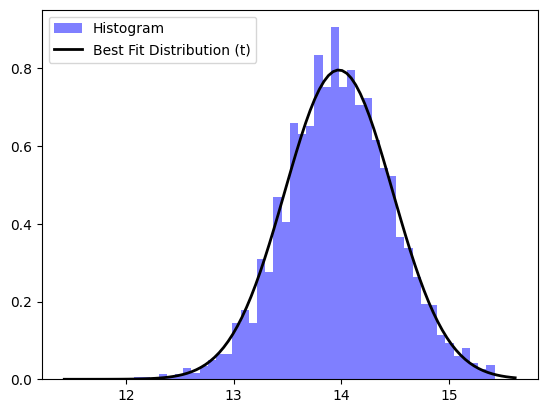

In [18]:
# Crear una instancia de distfit y ajustar las distribuciones a los datos
dist = distfit()
dist.fit_transform(log_annual_income)

# Obtener la distribución mejor ajustada y su función de densidad
best_distribution_name, best_distribution_params = dist.model['name'], dist.model['params']
best_distribution = dist.model['model']

# Plot histograma
plt.hist(log_annual_income, bins=50, density=True, alpha=0.5, color='b', label='Histogram')

# Plot función de densidad de distribución
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = best_distribution.pdf(x)  # Solo un argumento para la función de densidad
plt.plot(x, y, 'k', linewidth=2, label=f'Best Fit Distribution ({best_distribution_name})')

plt.legend()
plt.show()

### Forzamos la normal:

[MRDB]: Forzáis la normal?

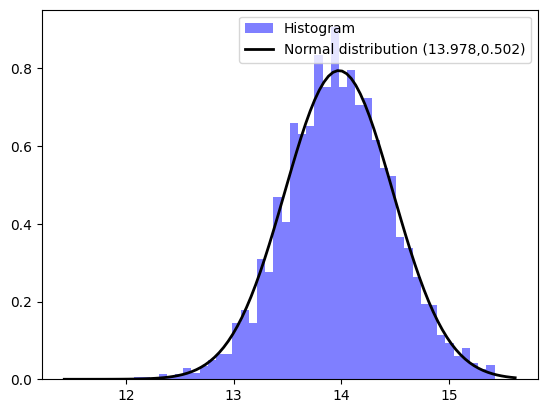

In [19]:
# Plot histograma
plt.hist(log_annual_income, bins=50, density=True, alpha=0.5, color='b', label='Histogram')

# Plot función de densidad de distribución
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x,13.978,0.502)  # Solo un argumento para la función de densidad
plt.plot(x, y, 'k', linewidth=2, label=f'Normal distribution (13.978,0.502)')

plt.legend()
plt.show()

# Ahora que sabemos encontrar la distribución teórica que encaja en nuestros datos podemos hacer una de las siguientes:
- Hacer lo mismo con el resto de variables.
- Estudiar los ingresos anuales.

## Análisis de la varianza (ANOVA)
### Estudiamos varianza entre distintos grupos.
###¿Hay diferencia de ingresos anuales medios entre grupos con más/menos años en el puesto de trabajo actual?

In [20]:
df_filtered['Years in current job'].unique()

array(['8 years', '3 years', '10+ years', '< 1 year', '2 years',
       '4 years', '1 year', '6 years', '5 years', '7 years', '9 years',
       nan], dtype=object)

In [21]:
df_filtered['Annual Income'] = np.log(df_filtered['Annual Income'])
df_filtered.dropna(subset=['Years in current job'],inplace=True)


In [22]:
df_filtered2 = df_filtered[['Annual Income', 'Years in current job']]
df_filtered2

,Annual Income,Years in current job
0,13.970369,8 years
2,14.618360,8 years
3,13.601016,3 years
5,13.706652,10+ years
6,13.984573,< 1 year
...,...,...
44595,13.710310,10+ years
44596,13.655362,3 years
44597,14.972371,10+ years
44598,13.851037,< 1 year


### Variabilidad de los datos de cada grupo

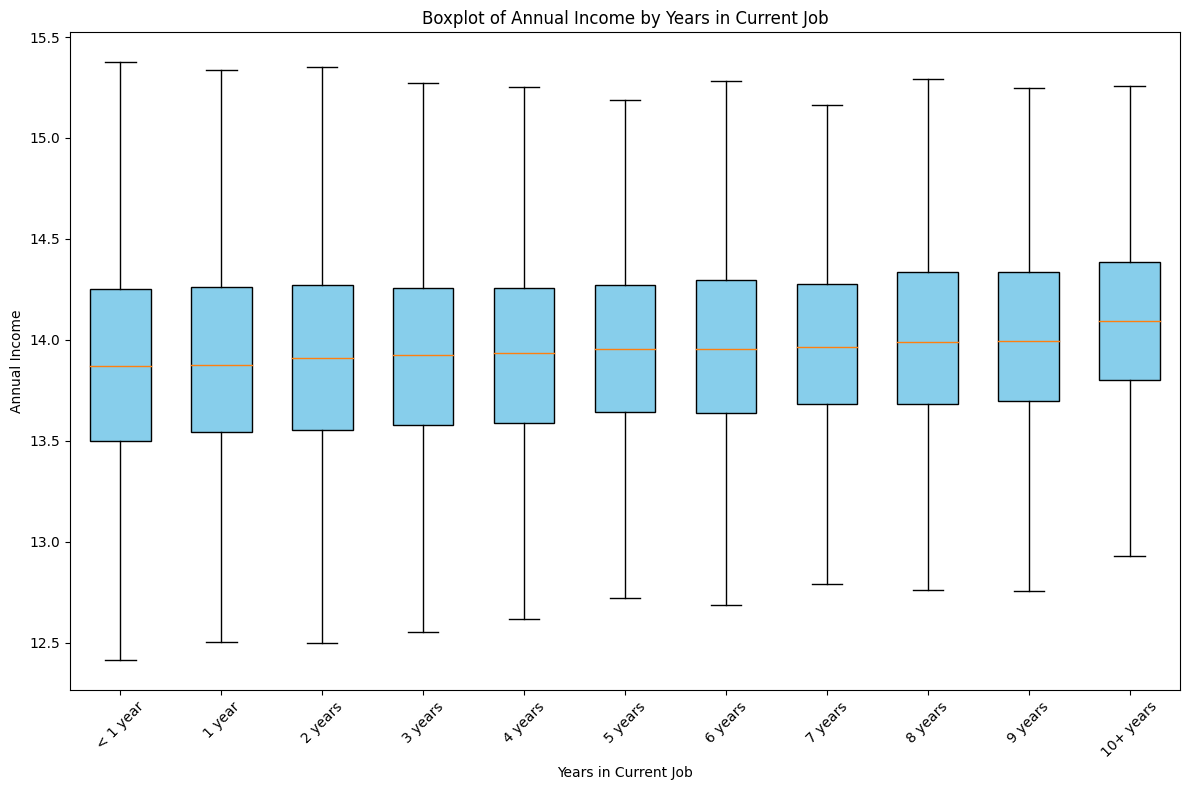

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_filtered2 is your DataFrame

# Define the unique categories in the 'Years in current job' column
years_categories = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Loop through each category and create a boxplot
for category in years_categories:
    # Filter the DataFrame for the current category
    data = df_filtered2[df_filtered2['Years in current job'] == category]['Annual Income']
    # Create a boxplot for the current category
    ax.boxplot(data, positions=[years_categories.index(category)], widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Set labels and title
ax.set_xticks(range(len(years_categories)))
ax.set_xticklabels(years_categories, rotation=45)
ax.set_xlabel('Years in Current Job')
ax.set_ylabel('Annual Income')
ax.set_title('Boxplot of Annual Income by Years in Current Job')

plt.tight_layout()
plt.show()



### Diferencia de varianzas : Levene's test

In [24]:
# Initialize dictionaries to store annual income for each group
annual_income_by_years = {}

# Iterate through the unique years in current job
for years_category in years_categories:
    # Initialize an empty list to store annual income for the current group
    annual_income_by_years[years_category] = []

# Iterate through the DataFrame
for index, row in df_filtered2.iterrows():
    # Extract the years in current job and annual income for the current row
    years_in_current_job = row['Years in current job']
    annual_income = row['Annual Income']

    # Append the annual income to the corresponding group list
    annual_income_by_years[years_in_current_job].append(annual_income)

In [25]:
from scipy.stats import levene
# Perform Levene's test
group_5_years = annual_income_by_years.get('5 years', [])
group_3_years = annual_income_by_years.get('3 years', [])
group_2_years = annual_income_by_years.get('2 years', [])
group_4_years = annual_income_by_years.get('4 years', [])
group_6_years = annual_income_by_years.get('6 years', [])
group_7_years = annual_income_by_years.get('7 years', [])
group_8_years = annual_income_by_years.get('8 years', [])
group_9_years = annual_income_by_years.get('9 years', [])
group_10_years = annual_income_by_years.get('10+ years', [])
group_1_years = annual_income_by_years.get('1 year', [])
group_m1_years = annual_income_by_years.get('< 1 year', [])
statistic, p_value_levene = levene(group_m1_years,group_1_years,group_10_years,group_9_years,group_8_years,group_7_years,group_6_years,group_4_years,group_2_years,group_3_years,group_5_years)

print("Levene's test results:")
print("Test statistic:", statistic)
print("p-value:", p_value_levene)

# Interpret the p-value
alpha = 0.05
if p_value_levene < alpha:
    print("The p-value is less than", alpha, "which indicates that the variances are not equal among groups (homogeneity of variances assumption is violated).")
else:
    print("The p-value is greater than or equal to", alpha, "which suggests that there is no significant difference in variances among groups (homogeneity of variances assumption is met).")


Levene's test results:
Test statistic: 48.39318576848542
p-value: 6.178128222506634e-97
The p-value is less than 0.05 which indicates that the variances are not equal among groups (homogeneity of variances assumption is violated).


### Analizamos 2 principales agrupaciones
Con el fin de profundizar nuestro analisis, hemos forjado 2 agrupaciones:
- Aquellos que llevan 4 años o menos en el puesto de trabajo.
- Aquellos que llevan 5 años o más en el puesto de trabajo.

#### Para llevar a cabo un ANOVA, debemos asumir que no hay diferencias entre varianzas de los grupos. Con el fin de identificar un conjunto de edades con igual varianza utilizaremos un contraste de Levene.

[MRDB]:  Esto está un poco desordenado y tampoco comentáis los resultados.

In [26]:
from scipy.stats import levene
# Extract data for the two groups
group_5_or_more = df_filtered2[df_filtered2['Years in current job'].isin(['5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])]['Annual Income']
group_4_or_less = df_filtered2[df_filtered2['Years in current job'].isin(['< 1 year', '1 year', '2 years', '3 years', '4 years'])]['Annual Income']
# Perform Levene's test
statistic, p_value_levene = levene(group_4_years,group_3_years,group_2_years,group_1_years,group_m1_years)

print("Levene's test results:")
print("Test statistic:", statistic)
print("p-value:", p_value_levene)

# Interpret the p-value
alpha = 0.05
if p_value_levene < alpha:
    print("The p-value is less than", alpha, "which indicates that the variances are not equal among groups (homogeneity of variances assumption is violated).")
else:
    print("The p-value is greater than or equal to", alpha, "which suggests that there is no significant difference in variances among groups (homogeneity of variances assumption is met).")


Levene's test results:
Test statistic: 9.667838989062176
p-value: 8.352854422467024e-08
The p-value is less than 0.05 which indicates that the variances are not equal among groups (homogeneity of variances assumption is violated).


In [27]:
# Extract data for the two groups
group_5_or_more = df_filtered2[df_filtered2['Years in current job'].isin(['5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])]['Annual Income']
group_4_or_less = df_filtered2[df_filtered2['Years in current job'].isin(['< 1 year', '1 year', '2 years', '3 years', '4 years'])]['Annual Income']
# Perform Levene's test
statistic, p_value_levene = levene(group_8_years,group_7_years,group_6_years,group_5_years)

print("Levene's test results:")
print("Test statistic:", statistic)
print("p-value:", p_value_levene)

# Interpret the p-value
alpha = 0.05
if p_value_levene < alpha:
    print("The p-value is less than", alpha, "which indicates that the variances are not equal among groups (homogeneity of variances assumption is violated).")
else:
    print("The p-value is greater than or equal to", alpha, "which suggests that there is no significant difference in variances among groups (homogeneity of variances assumption is met).")


Levene's test results:
Test statistic: 1.593631712325249
p-value: 0.18865081794142666
The p-value is greater than or equal to 0.05 which suggests that there is no significant difference in variances among groups (homogeneity of variances assumption is met).


#### T-Test

In [28]:
from scipy.stats import ttest_ind

# Perform independent samples t-test
t_statistic, p_value_ttest = ttest_ind(group_5_or_more, group_4_or_less)

print("Independent Samples T-test results:")
print("T-statistic:", t_statistic)
print("p-value:", p_value_ttest)

# Interpret the p-value
alpha = 0.05
if p_value_ttest < alpha:
    print("The p-value is less than", alpha, "which indicates that there is a significant difference in annual average income between the two groups.")
else:
    print("The p-value is greater than or equal to", alpha, "which suggests that there is no significant difference in annual average income between the two groups.")

Independent Samples T-test results:
T-statistic: 24.971905279306327
p-value: 2.0728199445215084e-136
The p-value is less than 0.05 which indicates that there is a significant difference in annual average income between the two groups.


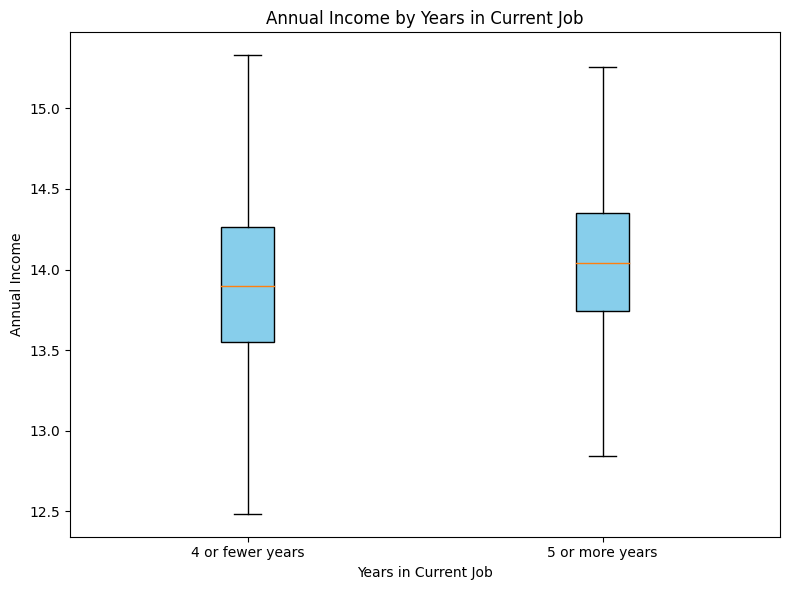

In [29]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Combine the data for the two groups
data_to_plot = [group_4_or_less, group_5_or_more]

# Define colors for the boxplots
colors = ['skyblue', 'lightgreen']

# Create boxplots for the combined data
ax.boxplot(data_to_plot, labels=['4 or fewer years','5 or more years'], showfliers=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))

ax.set_title('Annual Income by Years in Current Job')
ax.set_ylabel('Annual Income')
ax.set_xlabel('Years in Current Job')

plt.tight_layout()
plt.show()


## ANOVA
La prueba ANOVA nos permite comprobar si el Ingreso anual varía según los niveles de cuantos años se lleve en el puesto de trabajo. Esta prueba es concretamente para la agrupación de 5,6,7,8 años dado que es la agrupación que cumple con la asunción de homoscedasticidad.

In [30]:
from scipy.stats import f_oneway

# Prepare the data for the ANOVA test
data = []

# Loop through each category and extract the corresponding annual income data
#for category in years_categories:
 #   data.append(df_filtered2[df_filtered2['Years in current job'] == category]['Annual Income'])

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(group_5_years, group_6_years, group_7_years, group_8_years)

print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The p-value is less than", alpha, "which indicates that there are significant differences in annual income among the groups.")
else:
    print("The p-value is greater than or equal to", alpha, "which indicates that there are no significant differences in annual income among the groups.")

One-way ANOVA results:
F-statistic: 4.243187646200146
p-value: 0.005281923196244987
The p-value is less than 0.05 which indicates that there are significant differences in annual income among the groups.


[MRDB]:  Falta expplicación

## Tukey test

El contraste de Tuckey nos permite saber cuales son los pares reales de grupos para los que si hay una diferencia significativa, es decir en nuestro caso de uso, nos permitirá saber a partir de que temporalidad se produce un incremento relevante en el ingreso.

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------------------------------------
-1 year    1 year   0.0212  0.901 -0.0227  0.065  False
-1 year   2 years   0.0519 0.0015  0.0118  0.092   True
-1 year   3 years   0.0544 0.0011  0.0133 0.0955   True
-1 year   4 years   0.0613 0.0005  0.0166  0.106   True
-1 year   5 years   0.0927    0.0  0.0498 0.1355   True
-1 year   6 years   0.0955    0.0  0.0507 0.1403   True
-1 year   7 years   0.1142    0.0  0.0686 0.1598   True
-1 year   8 years   0.1422    0.0  0.0938 0.1905   True
-1 year   9 years   0.1402    0.0  0.0897 0.1907   True
-1 year 9.9 years   0.2228    0.0  0.1902 0.2555   True
 1 year   2 years   0.0307 0.4272 -0.0121 0.0735  False
 1 year   3 years   0.0332 0.3408 -0.0106  0.077  False
 1 year   4 years   0.0401 0.1822  -0.007 0.0873  False
 1 year   5 years   0.0715    0.0  0.0261 0.1169   True
 1 year   6 years   0.0743    0.0   0.027 0.1216

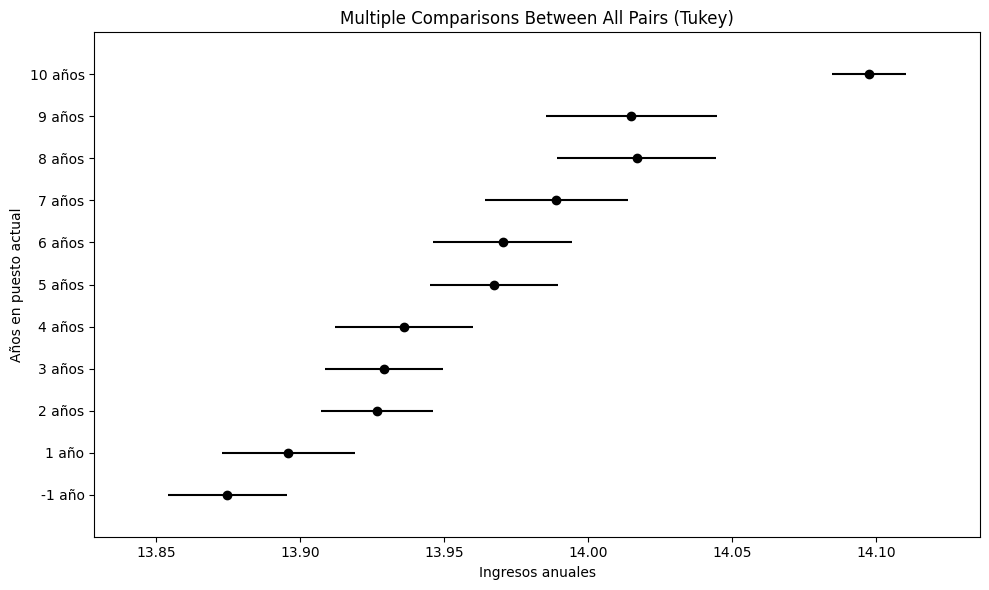

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

df_filtered2['Years in current job'] = df_filtered2['Years in current job'].replace('10+ years', '9.9 years')
df_filtered2['Years in current job'] = df_filtered2['Years in current job'].replace('< 1 year', '-1 year')



# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(df_filtered2['Annual Income'], df_filtered2['Years in current job'], alpha=0.05)
print(tukey.summary())              # See test summary

# Graficar los resultados con los grupos ordenados
tukey.plot_simultaneous()


# Set labels and title
plt.title('Diferencias entre medias')
plt.xlabel('Ingresos anuales')
plt.ylabel('Años en puesto actual')
plt.yticks([0,1,2,3,4,5,6,7,8,9,10], ['-1 año', '1 año', '2 años', '3 años', '4 años', '5 años', '6 años', '7 años', '8 años', '9 años', '10 años']
)

plt.tight_layout()
plt.show()



El resultado del test nos indica que no suele haber diferencias sustanciales en el ingreso anual entre aquellos que apenas llevan 1 año más en el puesto de trabajo. Sin embargo, si que se observan diferencias significativas entre aquellos que llevan a partir de 2 o 3 años más trabajando en el mismo sitio.

## CONCLUSIONES

Podemos concluir que existen diferencias significativas en los ingresos anuales entre la mayoria de grupos de tiempo en el puesto actual separados por más de 2 años. Si bien en el contraste de Tuckey con un α=0.05 no podemos rechazar la hipótesis nula de que algunos grupos separados por más de 2 años tienen medias significativamente distintas, el p valor es de 0.0523 para 2 - 6 años por ejemplo. Por ello, debemos ser cautos al interpretar estos resultados.

[MRDB]:  El contenido mejorable. La presentación muy mejorable. Os falta un montón de redacción de resultados. Nota 5.5